# Algorithms - Graphs

## Exercise 1: Graph Making

### 1.1: Write a function called make_simple_graph that returns the graph object that represents the following diagram:

![ex2](../assets/exercise2.png)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# exercise 1.1

def make_simple_graph(): 
    fig, ax = plt.subplots(figsize=(5.5,4.5))
    graph = nx.Graph([
        ('A','C'),
        ('C','E'),
        ('E','D'),
        ('D','B'),
        ('E','A'),
        ('D','A')])
    nx.draw_networkx(graph,node_color='red',edge_color='black',edgecolors='black',with_labels=True)
    plt.axis('off')
# nx.draw_networkx?

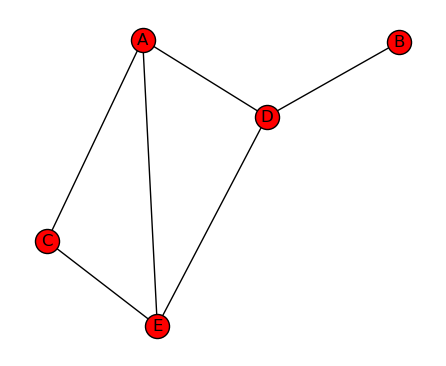

In [3]:
G = make_simple_graph()

### 1.2: computing node degrees of graphs

For the graph made by your function in the previous exercise, calculate the degrees of each node, and visually confirm those values by inspecting the above graph. Write a function `compute_degrees` which takes a networkx graph object as input, and returns a `dict` with the degrees of all the nodes in the graph.

**NOTE:** You cannot use the diameter or degree method from networkx directly to compute the degrees. 

```
compute_degrees(G) -> {
    'degree_A': 3,
    'degree_B': 1,
    'degree_C': 2,
    'degree_D': 3,
    'degree_E': 3,
}
```

In [4]:
# exercise 1.2

def compute_degrees(graph):
    keys = []
    values = []
    for node in list(graph.nodes()):
        keys.append(f"degree_:{node}")
        values.append(len(graph[node].values()))
    res_dict = dict(zip(keys,values))
    return res_dict

In [5]:
my_graph = nx.Graph([
        ('A','C'),
        ('B','D'),
        ('D','A'),
        ('C','E'),
        ('E','D'),
        ('E','A'),
])

compute_degrees(my_graph)

{'degree_:A': 3,
 'degree_:C': 2,
 'degree_:B': 1,
 'degree_:D': 3,
 'degree_:E': 3}

### 1.3: An airline route map graph

CBDS Airlines has the following route map for the cities that it services, where every pair of cities has service in both directions between the cities:

```
routemap =  [('St. Louis', 'Miami'), ('St. Louis', 'San Diego'), ('St. Louis', 'Chicago'), ('San Diego', 'Chicago'), ('San Diego', 'San Francisco'), ('San Diego', 'Minneapolis'), ('San Diego', 'Boston'), ('San Diego', 'Portland'), ('San Diego', 'Seattle'), ('Tulsa', 'New York'), ('Tulsa', 'Dallas'), ('Phoenix', 'Cleveland'), ('Phoenix', 'Denver'), ('Phoenix', 'Dallas'), ('Chicago', 'New York'), ('Chicago', 'Los Angeles'), ('Miami', 'New York'), ('Miami', 'Philadelphia'), ('Miami', 'Denver'), ('Boston', 'Atlanta'), ('Dallas', 'Cleveland'), ('Dallas', 'Albuquerque'), ('Philadelphia', 'Atlanta'), ('Denver', 'Minneapolis'), ('Denver', 'Cleveland'), ('Albuquerque', 'Atlanta'), ('Minneapolis', 'Portland'), ('Los Angeles', 'Seattle'), ('San Francisco', 'Portland'), ('San Francisco', 'Seattle'), ('San Francisco', 'Cleveland'), ('Seattle', 'Portland')]

```

Copy this data into a networkX graph to answer the question.

1. What is the maximum number of hops that would ever be taken by a passenger on a single trip between any two serviced cities?

2. If you were a rich jet-setter traveling everywhere in across the country and were constrained to fly CBDS, which city would be the most optimal place for you to live, to minimize the number of hops you would have to make on average as you jet from home to your latest vacation spot?


In [6]:
# exercise 1.3

routemap =  [('St. Louis', 'Miami'), ('St. Louis', 'San Diego'), 
             ('St. Louis', 'Chicago'), ('San Diego', 'Chicago'), 
             ('San Diego', 'San Francisco'), ('San Diego', 'Minneapolis'), 
             ('San Diego', 'Boston'), ('San Diego', 'Portland'), 
             ('San Diego', 'Seattle'), ('Tulsa', 'New York'), 
             ('Tulsa', 'Dallas'), ('Phoenix', 'Cleveland'), 
             ('Phoenix', 'Denver'), ('Phoenix', 'Dallas'), 
             ('Chicago', 'New York'), ('Chicago', 'Los Angeles'), 
             ('Miami', 'New York'), ('Miami', 'Philadelphia'), 
             ('Miami', 'Denver'), ('Boston', 'Atlanta'), 
             ('Dallas', 'Cleveland'), ('Dallas', 'Albuquerque'), 
             ('Philadelphia', 'Atlanta'), ('Denver', 'Minneapolis'), 
             ('Denver', 'Cleveland'), ('Albuquerque', 'Atlanta'), 
             ('Minneapolis', 'Portland'), ('Los Angeles', 'Seattle'), 
             ('San Francisco', 'Portland'), ('San Francisco', 'Seattle'), 
             ('San Francisco', 'Cleveland'), ('Seattle', 'Portland')]

In [7]:
from collections import deque

class Graph:
    def __init__(self, graph_list):
        self.graph_list = graph_list
        self.vertices = len(nx.Graph(self.graph_list).nodes)
        self.adj = {i: [] for i in range(self.vertices)}
        self.graph = nx.Graph(self.graph_list)
    
    def draw(self):
        G = nx.Graph(self.graph_list)
        return nx.draw(G,node_color='violet',edge_color='navy',with_labels=True)
        
    def vertices(self):
        return self.vertices
    
    def graph(self):
        return self.graph
    
    def longest_path(self, source, target):
        paths = nx.all_simple_paths(self.graph, source, target)
        hops = []
        path_list = []
        for path in paths:
            hops.append(len(path))
            path_list.append(path)
        dict_paths = dict(zip(hops,path_list))
        for key,value in dict_paths.items():
            if key >= 19 and value!=None and key!=None: 
                return("Key : {} , Value : {}".format(key,value))
    
    def all_paths(self, source, target):
        s_paths = nx.all_simple_paths(self.graph, source, target)
        s_hops = []
        s_path_list = []
        for s_path in s_paths:
            s_hops.append(len(s_path))
            s_path_list.append(s_path)
        s_dict_paths = dict(zip(s_hops,s_path_list))
        s_dict_count = {}
        for i in range(1,self.vertices+1):
            count = 0
            for j in range(len(s_hops)):
                if s_hops[j]==i:
                    count+=1
            s_dict_count[i] = count
        return s_dict_count

In [8]:
routemap_graph = Graph(routemap)

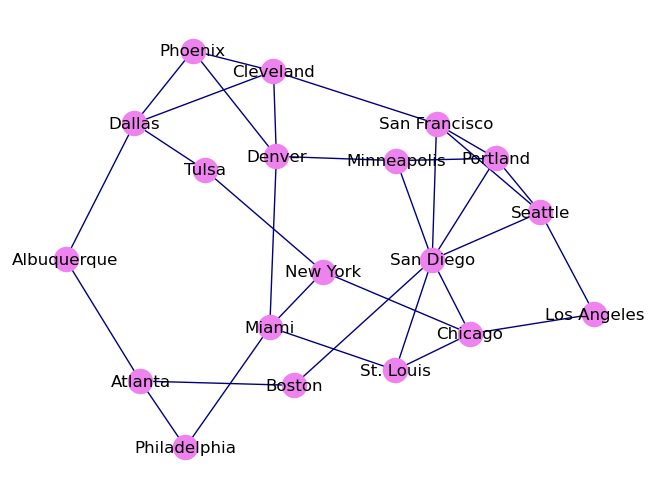

In [24]:
routemap_graph.draw()

In [20]:
routemap_graph.vertices

19

In [11]:
def max_hops():
    max_paths = []
    for start in list(routemap_graph.graph.nodes):
        for end in list(routemap_graph.graph.nodes):
            if routemap_graph.longest_path(start,end) != None:
                max_paths.append(f"{start}->{end}")
    return max_paths

In [12]:
########## Answer 1.3.1 ##########

print(f"There are {len(max_hops())} paths using the maximum number of hops being 18 hops between the 19 cities (nodes).")

There are 56 paths using the maximum number of hops being 18 hops between the 19 cities (nodes).


In [13]:
def hops_dist():
    hops_dist = {}
    for start in list(routemap_graph.graph.nodes):
        for end in list(routemap_graph.graph.nodes):
            if start!=end:
                hops_dist[f"{start}-{end}"]=routemap_graph.all_paths(start, end)
    return hops_dist

In [14]:
hops_dist()['Albuquerque-Atlanta']

{1: 0,
 2: 1,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 4,
 8: 8,
 9: 16,
 10: 32,
 11: 55,
 12: 84,
 13: 121,
 14: 160,
 15: 148,
 16: 71,
 17: 16,
 18: 6,
 19: 0}

In [15]:
def city_hops():
    dist_dict = hops_dist()
    city_hops = {}
    for city in list(routemap_graph.graph.nodes):
        res = 0
        for item in dist_dict:
            if item.split("-")[0] == city:
                for count in dist_dict[item]:
                    res += count*dist_dict[item][count]
        city_hops[city]=res
    return city_hops

In [16]:
city_hops_dict = city_hops()
city_hops_dict

{'St. Louis': 237055,
 'Miami': 159920,
 'San Diego': 105356,
 'Chicago': 177066,
 'San Francisco': 197492,
 'Minneapolis': 233938,
 'Boston': 253229,
 'Portland': 203919,
 'Seattle': 197227,
 'Tulsa': 256945,
 'New York': 211139,
 'Dallas': 155585,
 'Phoenix': 229870,
 'Cleveland': 178714,
 'Denver': 171487,
 'Los Angeles': 262808,
 'Philadelphia': 251020,
 'Atlanta': 209238,
 'Albuquerque': 249762}

In [17]:
def least_hops():
    least_hops = city_hops_dict['St. Louis']
    least_hops_city = 'St. Louis'
    for city in city_hops_dict:
        if city_hops_dict[city]<least_hops:
            least_hops = city_hops_dict[city]
            least_hops_city = city
    return least_hops, least_hops_city

In [18]:
########## Answer 1.3.2 ##########

print(f"The city with minimal hops is {list(least_hops())[1]} with a total hops count of {list(least_hops())[0]}.")

The city with minimal hops is San Diego with a total hops count of 105356.
